# shapes layer tutorial

Welcome to the tutorial on the **napari** `Shapes` layer!

This tutorial assumes you have already installed **napari**, know how to launch
the viewer, and are familiar with its layout. For help with installation see our
[installation](./installation) tutorial. For help getting started with the
viewer see our [getting started](./getting_started) tutorial. For help
understanding the organisation of the viewer, including things like the layers
list, the layer properties widgets, the layer control panels, and the dimension
sliders see our [napari viewer](./viewer) tutorial.

This tutorial will teach you about the **napari** `Shapes` layer, including how
to display and edit shapes like rectangle, ellipses, polygons, paths, and lines.
At the end of the tutorial you should understand how to add a shapes layer and
edit it from the GUI and from the console.

The points layer allows you to display a list of an NxD arrays, where each array
corresponds to one shape, specified by N points in D coordinates. You can adjust
the position, size, face color, edge color, and opacity of all the shapes
independently, both programmatically and from the GUI.

## a simple example

You can create a new viewer and add a list of shapes in one go using the
`napari.view_shapes` method, or if you already have an existing viewer, you can
add shapes to it using `viewer.add_shapes`. The api of both methods is the same.
In these examples we'll mainly use `add_shapes` to overlay shapes onto on an
existing image.

In this example of we will overlay some shapes on the image of a photographer:

In [1]:
import napari
import numpy as np
from skimage import data

# create the list of polygons
triangle = np.array([[11, 13], [111, 113], [22, 246]])

person = np.array([[505, 60], [402, 71], [383, 42], [251, 95], [212, 59],
                   [131, 137], [126, 187], [191, 204], [171, 248], [211, 260],
                   [273, 243], [264, 225], [430, 173], [512, 160]])

building = np.array([[310, 382], [229, 381], [209, 401], [221, 411],
                     [258, 411], [300, 412], [306, 435], [268, 434],
                     [265, 454], [298, 461], [307, 461], [307, 507],
                     [349, 510], [352, 369], [330, 366], [330, 366]])

polygons = [triangle, person, building]

# add the image
viewer = napari.view_image(data.camera(), name='photographer')

# add the polygons
shapes_layer = viewer.add_shapes(polygons, shape_type='polygon', edge_width=5,
                          edge_color='coral', face_color='royalblue')

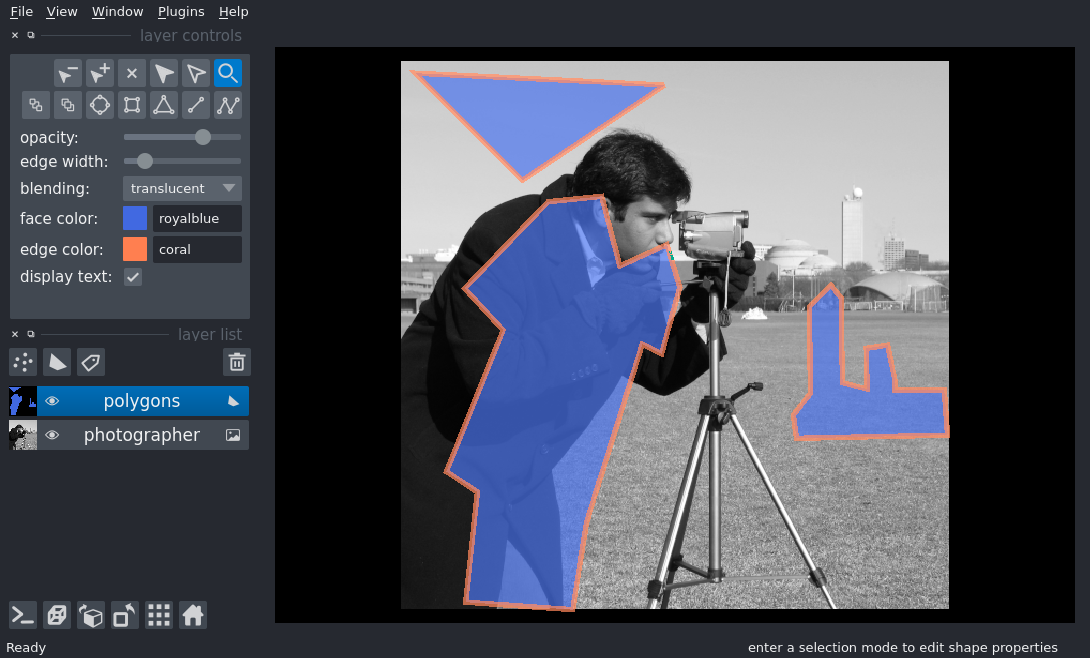

In [2]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

In [3]:
viewer.close()

## arguments of view_shapes and add_shapes

{meth}`~napari.view_layers.view_shapes` and {meth}`~napari.Viewer.add_shapes`
accept the same layer-creation parameters.

In [4]:
help(napari.view_shapes)

Help on function view_shapes:

view_shapes(data=None, *, ndim=None, properties=None, text=None, shape_type='rectangle', edge_width=1, edge_color='black', edge_color_cycle=None, edge_colormap='viridis', edge_contrast_limits=None, face_color='white', face_color_cycle=None, face_colormap='viridis', face_contrast_limits=None, z_index=0, name=None, metadata=None, scale=None, translate=None, rotate=None, shear=None, affine=None, opacity=0.7, blending='translucent', visible=True, title='napari', ndisplay=2, order=(), axis_labels=(), show=True)
    Create a viewer and add a shapes layer.
    
    Parameters
    ----------
    data : list or array
        List of shape data, where each element is an (N, D) array of the
        N vertices of a shape in D dimensions. Can be an 3-dimensional
        array if each shape has the same number of vertices.
    ndim : int
        Number of dimensions for shapes. When data is not None, ndim must be D.
        An empty shapes layer can be instantiated wit

## shapes data

The input data to the shapes layer must be a list of NxD numpy array, with each
array containing the coordinates of the N vertices in D dimensions that make up
the shape. The ordering of these dimensions is the same as the ordering of the
dimensions for image layers. This list of arrays is always accessible through
the `layer.data` property and will grow or shrink as new shapes are either added
or deleted. By storing data as a list of arrays it is possible for each shape to
have a different number of vertices in it. This is especially useful when
drawing polygons or paths.

## adding different shape types

Right now the shapes layer supports 5 types of shapes, `Lines`, `Rectangles`,
`Ellipses`, `Polygons`, and `Paths`. When adding new data can set the shape type
through the `shape_type` keyword argument, as either a single shape type if all
the shapes to be added have the same type or as a list of shape types if some of
the shapes have different types. The actual shape types of all the shapes is
accessible through the `layer.shape_types` property. Selecting different shape
creation tools will cause shapes of the different types to be added.

`Lines` consist of two vertices representing the end points of the line. The
line creation tool can be selected from the layer control panel or by pressing
the `L` key when the shapes layer is selected. When adding a new line the first
click will coordinates of the first endpoint and the second click will mark the
coordinates of the second endpoint. You'll then be able to add another line.

`Rectangles` can be added using two vertices representing the corners of the
rectangle for axis aligned rectangle, or using four corners so that non-axis
aligned rectangle can be represented too. Internally we use the four vertex
representation so we can always support rotated rectangles. The rectangle
creation tool can be selected from the layer control panel or by pressing the
`R` key when the shapes layer is selected. When adding a rectangle you must
click and drag the rectangle to have the desired shape. When you release the
mouse the rectangle will be completed and you'll then be able to add another
one. If you just make a single click then a rectangle of default size will be
created centered on that click.

`Ellipses` can be added using either two vectors, one representing the center
position of the ellipse and the other representing the radii of the ellipse in
all dimensions for an axis aligned ellipse, or by using the four corners of the
ellipse bounding box for a non-axis aligned ellipse. Internally we use the four
vertex representation so we can always support rotated ellipses. The ellipse
creation tool can be selected from the layer control panel or by pressing the
`E` key when the shapes layer is selected. When adding an ellipse you must click
and drag the ellipse to have the desired shape. When you release the mouse the
ellipse will be completed and you'll then be able to add another one. If you
just make a single click then an ellipse of default size will be created
centered on that click.

`Polygons` can be added using an array of N vertices. Polygons are closed by
default, and so you don't also need to include the first point at the end of the
array. The order of the vertices will determine the triangulation of the
polygon, which can be non-convex, but cannot have holes. The polygon creation
tool can be selected from the layer control panel or by pressing the `P` key
when the shapes layer is selected. When adding a polygon each click will add a
vertex at the clicked location. To finish drawing a polygon you must click the
`escape` key, which will add a final vertex at the current mouse position and
complete the polygon. You'll then be able to start adding another one.

`Paths` are like polygons but are not closed or filled in. They can also be
added using an array of N vertices. The path creation tool can be selected from
the layer control panel or by pressing the `T` key when the shapes layer is
selected. When adding a path each click will add a vertex at the clicked
location. To finish drawing a path you must click the `escape` key, which will
add a final vertex at the current mouse position and complete the path. You'll
then be able to start adding another one.

When using the shapes addition or editing tools the pan and zoom functionality
of the viewer canvas is disabled and you can edit the layer. You can temporarily
re-enable pan and zoom by pressing and holding the spacebar. This feature can be
useful if you want to move around the shapes layer as you edit it.

## creating a new shapes layer

As you can add new shapes to a shapes layer using the various shape creation
tools, it is possible to create a brand-new empty shapes layers by clicking the
new shapes layer button above the layers list. The shape of the shapes layer is
defined by the shapes inside it, and so as you add new shapes the shape will
adjust as needed. The dimension of the new shapes layer will default to the
largest dimension of any layer currently in the viewer, or to 2 if no other
layers are present in the viewer.

## non-editable mode

If you want to disable editing of the shapes layer you can set the `editable`
property of the layer to `False`.

As note in the section on 3D rendering, when using 3D rendering the shapes layer
is not editable.

## 3D rendering of shapes

All our layers can be rendered in both 2D and 3D mode, and one of our viewer
buttons can toggle between each mode. The number of dimensions sliders will be 2
or 3 less than the total number of dimensions of the layer. See for example the
[`examples/nD_shapes.py`](https://github.com/napari/napari/blob/master/examples/nD_shapes.py)
to see shapes in both 2D and 3D:

![image: nD shapes](../assets/tutorials/nD_shapes.gif)

Note though that when entering 3D rendering mode the shape editing tools are all
disabled. Those options are only supported when viewing a layer using 2D
rendering.

Also note that for a multidimensional shape to be displayed on a given view
slice all of its non-displayed coordinates must match the coordinates of that
view slice, i.e. the shape must be entirely defined within that plane.

For paths that are defined by coordinates spanning more than two dimensions, it
is possible to visualize them as 3D cylinders, see for example the
[`examples/3D_paths.py`](https://github.com/napari/napari/blob/master/examples/3D_paths.py)

![image: 3D paths](../assets/tutorials/3D_paths.png)

Right now, it is not possible to display 3D cuboids or 3D spheroids, but will be
supporting those options soon.

## pan and zoom mode

The default mode of the shapes layer is to support panning and zooming, as in
the image layer. This mode is represented by the magnifying glass in the layers
control panel, and while it is selected editing the layer is not possible.
Continue reading to learn how to use some of the editing modes. You can always
return to pan and zoom mode by pressing the `Z` key when the shapes layer is
selected.

## selecting, resizing, moving, and deleting shapes

New shapes can be added using one of the 5 shape creation tools, for `Lines`,
`Rectangles`, `Ellipses`, `Polygons`, and `Paths`. For more information on the
different shape types see the shape types section.

You can select a shape by clicking on it using the shape selection tool, which
can be selected by clicking on it in the layer controls panel or by pressing the
`S` key when the shapes layer is selected. Once selected you can move the shape
by dragging it. You can also resize the shape by clicking and dragging on one of
the handles along the edge of the shape bounding box. You can also rotate the
shape by clicking and dragging on the rotation handle above the shape bounding
box.

When resizing a layer if you hold down the `shift` key the aspect ratio of the
shape will lock and you can continue to resize the shape now with a fixed aspect
ratio.

You can select multiple shapes by continuing to shift click on additional shapes
after the first, or by dragging a bounding box around the shapes you want to
select.

You can select all the shapes in the currently viewed slice by clicking the `A`
key if you are in select mode.

Once selected you can delete the selected shapes by clicking on the delete
button in the layer controls panel or pressing the delete key.

For example see below: ![image: shape
resizing](../assets/tutorials/shape_resizing.gif)

## adding, moving, and deleting individual vertices

You can move individual vertices by entering the direct selection mode by either
clicking on the direct select tool in the layer controls panel or pressing the
`D` key while the shapes layer is selected. To move a vertex, you can click and
drag it to its new position.

You can add vertices to a selected shape using the vertex addition tool which
can be selected either clicking on the vertex addition tool in the layer
controls panel or pressing the `I` key while the shapes layer is selected.

You can delete vertices to a selected shape using the vertex deletion tool which
can be selected either clicking on the vertex deletion tool in the layer
controls panel or pressing the `X` key while the shapes layer is selected.

For example see below: ![image: shape vertex
editing](../assets/tutorials/shape_vertex_editing.gif)

## changing shape edge and face colors

Individual shapes can each have different edge and face colors. You can
initially set these colors by providing a list of colors to the `edge_color` or
`face_color` keyword arguments respectively, or you can edit them from the GUI.
The colors of each of the shapes are available as lists under the
`layer.edge_colors` and `layer.face_colors` properties. These properties are
different from the `layer.edge_color` and `layer.face_color` properties that
will determine the color of the next shape to be added or any currently selected
shapes.

To change the shape color properties from the GUI you must first select the
shape whose properties you want to change, otherwise you will just be
initializing the property for the next shape you add.

## changing shape edge widths

Individual shapes can each have different edge widths. You can initially set the
edge widths by providing a list of values to the `edge_width` keyword arguments
respectively, or you can edit them from the GUI. The widths of each of the
shapes are available as a list under the `layer.edge_widths` property. Similar
to the edge and face colors, these property is different from the
`layer.edge_width` property that will determine the edge width of the next shape
to be added or any currently selected shapes.

To change the edge with property from the GUI you must first select the shape
whose properties you want to change, otherwise you will just be initializing the
property for the next shape you add.

## layer ordering

You can adjust the ordering of shapes in the layer by selecting shapes and then
clicking the move to front or move to back buttons. You can get the ordering of
all the shapes using the `layer.z_indices` property. You can also set the
initial ordering of shapes by passing a list to the `layer.z_index` property.

## copying and pasting shapes

It is possible to copy and paste any selected shapes using the `ctrl-C` and
`ctrl-V` keybindings respectively. If you have a multidimensional shapes layer
you can copy shapes from one slice to another by pasting them into the new
slice. The coordinates of the shapes in the visible dimensions will be in the
same place on the new slice as in the old slice, but the rest of the coordinates
will be updated with the new slice values.

## layer visibility

All our layers support a visibility toggle that allows you to set the `visible`
property of each layer. This property is located inside the layer widget in the
layers list and is represented by an eye icon.

## layer opacity

All our layers support an opacity slider and `opacity` property that allow you
to adjust the layer opacity between 0, fully invisible, and 1, fully visible.
The opacity value applies individually to each shape in the layer, and so you
must have shapes selected for it to have an effect.

You can also initialize the shape opacities using the `opacity` keyword argument
which accepts either a list of opacities or a single opacity value that will be
applied globally. You can then access the opacity of every shape using the
`layer.opacities` property. Note that this property is different from the
`layer.opacity` property that determines the opacity of the next shape to be
added.

## blending layers

All our layers support three blending modes `translucent`, `additive`, and
`opaque` that determine how the visuals for this layer get mixed with the
visuals from the other layers.

An `opaque` layer renders all the other layers below it invisible and will fade
to black as you decrease its opacity.

The `translucent` setting will cause the layer to blend with the layers below it
if you decrease its opacity but will fully block those layers if its opacity is
1. This is a reasonable default, useful for many applications.

The final blending mode `additive` will cause the layer to blend with the layers
below even when it has full opacity. This mode is especially useful for
visualizing multiple layers at the same time.

## naming layers

All our layers support a `name` property that can be set inside a text box
inside the layer widget in the layers list. The name of each layer is forced
into being unique so that you can use the name to index into `viewer.layers` to
retrieve the layer object.

## scaling layers

All our layers support a `scale` property and keyword argument that will rescale
the layer multiplicatively according to the scale values (one for each
dimension). This property can be particularly useful for viewing anisotropic
data where the size of the voxel in the z dimension might be different then the
size in the x and y dimensions.

## translating layers

All our layers support a `translate` property and keyword argument that you can
use to offset a layer relative to the other layers, which could be useful if you
are trying to overlay two layers for image registration purposes.

## layer metadata

All our layers also support a `metadata` property and keyword argument that you
can use to store an arbitrary metadata dictionary on the layer.

## putting it all together

Here you can see an example of adding, selecting, and editing shapes and change
their properties:

![image: editing shapes](../assets/tutorials/editing_shapes.gif)

## next steps

Hopefully, this tutorial has given you a detailed understanding of the `Shapes`
layer, including how to create one and control its properties. To learn more
about some of the other layer types that **napari** supports checkout some more
of our tutorials listed below. The [surface layer](./surface) tutorial is a
great one to try next as it describes rendering complex surfaces.